# Prediction of Baseball Hitters Salary using Linear Regression Model

### Michael A. Akinola (other contributors: Adebukola C. Aladeyelu, Afeez A. Oladokun, Eniola E. Oladele) 

### 1.0 INTRODUCTION

Linear regression attempts to model the relationship between two sets of variables by fitting a linear equation to observed data. One set of variables is explanatory variable, and the other is the dependent or response variable. If there is just one explanatory variable, we have a simple linear regression. If there are more than one explanatory variables, we have a multiple linear regression. 

The most common method for fitting a regression line is the method of least-squares. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0).

In this work we deployed the method of least-squares to attempt predict the salary of baseball hitters.

In [3]:
# ==========
# LIBRARIES 
# ==========

#### Install ####

# install.packages("funModeling")
# install.packages("naniar")
# install.packages("nortest")
# install.packages("dplyr")
# install.packages(car)
# install.packages(faraway)
# install.packages("gvlma")

#### Import ####

library("funModeling")
library("naniar")
library("nortest")
library("dplyr")
library("car")
library("faraway")
library("gvlma")
library("alr3")
library("MASS")
library("moments")

### 2.0 DATASET

NAME:  Pay for Play:  Are Baseball Salaries Based on Performance?

TYPE:  Census

SIZE:  337 observations, 18 variables

The owners of this dataset considered as their population of interest the set of Major League Baseball players who played at least one game in both the 1991 and 1992 seasons, excluding pitchers.  This dataset contains the 1992 salaries for that population, along with performance measures for each player from 1991.  

Baseball provides a rare opportunity to judge the value of an employee - in this case, a player - by standardized measures of performance. The question is, what are those characteristics worth?  In addition, the economic principle of freedom of movement for employees can be measured; that is, what financial benefit does a person gain if he is able to change employers?  Additionally, baseball fans may use their analysis of this dataset, in combination with other similar datasets, to gain insight into the salary structure in Major League Baseball.

#### 2.1 Initial Data Inspection

In [4]:
# Bringing in the dataset

baseball <- read.table(file="http://www.amstat.org/publications/jse/datasets/baseball.dat.txt", header=FALSE, 
                       col.names=c("salary", "batting.avg", "OBP", "runs", "hits", "doubles", "triples", "homeruns", 
                                   "RBI", "walks", "strike.outs", "stolen.bases", "errors", "free.agency.elig", 
                                   "free.agent.91", "arb.elig", "arb.91", "name"))

In [5]:
# Dimension of dataset

"Data contains the following number of rows and columns respectively"
dim(baseball)

[1] "Data contains the following number of rows and columns respectively"

[1] 337  18

In [6]:
# Top six rows of data and Bottom six rows of data

"Top six rows:"
head(baseball)

"Bottom six rows:"
tail(baseball)

[1] "Top six rows:"

salary,batting.avg,OBP,runs,hits,doubles,triples,homeruns,RBI,walks,strike.outs,stolen.bases,errors,free.agency.elig,free.agent.91,arb.elig,arb.91,name
3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace
2175,0.291,0.379,104,170,32,2,26,100,87,89,22,4,1,0,0,0,Ryne Sandberg


[1] "Bottom six rows:"

,salary,batting.avg,OBP,runs,hits,doubles,triples,homeruns,RBI,walks,strike.outs,stolen.bases,errors,free.agency.elig,free.agent.91,arb.elig,arb.91,name
332,183,0.213,0.312,36,57,8,3,2,26,39,32,8,15,0,0,0,0,Jeff Huson
333,170,0.111,0.138,3,3,0,0,0,1,1,7,0,0,0,0,0,0,John Russell
334,160,0.264,0.318,24,48,7,0,1,22,15,18,0,7,0,0,0,0,Mario Diaz
335,142,0.187,0.281,38,50,9,2,15,37,32,98,0,9,0,0,0,0,Dean Palmer
336,140,0.264,0.270,24,74,16,0,3,27,5,42,0,10,0,0,0,0,Ivan Rodriguez
337,109,0.258,0.395,6,8,1,0,1,6,7,11,0,0,0,0,0,0,Monty Fariss


#### Transformation of Salary column

We transformed the Salary column using log-transformation.

In [7]:
# Getting the Logarithm to natural base of the salary 

baseball$logsalary <- log(baseball$salary)
head(baseball)

salary,batting.avg,OBP,runs,hits,doubles,triples,homeruns,RBI,walks,strike.outs,stolen.bases,errors,free.agency.elig,free.agent.91,arb.elig,arb.91,name,logsalary
3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson,8.101678
2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele,7.863267
2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels,7.824046
2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston,7.813996
2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace,7.746301
2175,0.291,0.379,104,170,32,2,26,100,87,89,22,4,1,0,0,0,Ryne Sandberg,7.684784


### 3.0 METHOD

This work takes three parts. First is Exploratory Data Analysis, EDA from which we obtained the histograms of both salary and the logarithm (natural base) of salary and we proceeded with the log-transformed salary from this step on in the project. We inspected the data and answered the following questions: Are there any missing data? Among all the predictors, how many of them are continuous, integer counts, and categorical, respectively. From the EDA, we came up with few interesting findings about the data.

The second part is the application of Linear regression model to predict a hitter's salary based on performance variables. We fitted two models:
(a)	A model where the response variable is the log-transformed salary and the predictors are hits, RBI, walks, strike.outs, errors, free.agency.elig.
(b)	A model where the response variable is the log-transformed salary and the predictors are hits, RBI, walks, strike.outs, errors, free.agency.elig, free.agent.91, arb.elig.

We found the coefficients of the predictors, the R-squared and adjusted R-squared and analyzed the models. We also checked for multicollinearity issue with the predictors and provided justification for our answer.
Furthermore, we checked for the linear regression model assumptions. We checked for the conditional mean response is a LINEAR function of the predictor variables; the errors are INDEPENDENT random variables; the errors are conditionally NORMAL random variables, given the predictor variable values; and if the errors have EQUAL variance (Homoscedasticity) and made comments based on our findings.
Outlier detection is carried out to identify outliers that are outlying in terms of predictors and response and made comments on the outlying players.

The third and final part is comparison of the models. We compared the first model with the second model. We deployed two methods to validate this and came up with the better model in our opinion for prediction with reasons.

#### 3.1 Exloratory Data Analysis, EDA 

There are 337 observations and 19 (additional one after transformation) variables with no missing value.

The df_status() function dispaly quantity and percentage of zeros (q_zeros and p_zeros respectevly). Same metrics for NA values (q_NA and p_na). Last two columns indicates data type and quantity of unique values.

The outputs of the function df_status() showed there are 337 unique players in the dataset, one factor/text variable, four categorical variables and fourteen continuous variables.

The five number summary showed that minimum salary is 109 and maximum salary is 6100 units.

The histogram shows salary is skewed to the right and log salary kind of uniform. From the Q-Q plot, the salary data is not normally distributed while the log salary looks near normal.

In [8]:
# Missing check 

colMeans(is.na(baseball))

salary      batting.avg              OBP             runs 
               0                0                0                0 
            hits          doubles          triples         homeruns 
               0                0                0                0 
             RBI            walks      strike.outs     stolen.bases 
               0                0                0                0 
          errors free.agency.elig    free.agent.91         arb.elig 
               0                0                0                0 
          arb.91             name        logsalary 
               0                0                0

In [9]:
#### Metrics of data: data types, zeros, infinite numbers, and missing values ####

df_status(baseball)

           variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1            salary       0    0.00    0    0     0     0 integer    208
2       batting.avg       0    0.00    0    0     0     0 numeric    133
3               OBP       0    0.00    0    0     0     0 numeric    139
4              runs       4    1.19    0    0     0     0 integer    105
5              hits       0    0.00    0    0     0     0 integer    163
6           doubles       7    2.08    0    0     0     0 integer     44
7           triples      86   25.52    0    0     0     0 integer     14
8          homeruns      45   13.35    0    0     0     0 integer     36
9               RBI       2    0.59    0    0     0     0 integer    106
10            walks       3    0.89    0    0     0     0 integer     90
11      strike.outs       0    0.00    0    0     0     0 integer    118
12     stolen.bases      69   20.47    0    0     0     0 integer     48
13           errors      27    8.01    0    0     0

In [10]:
# Five number summary of variables

summary(baseball)

     salary      batting.avg          OBP             runs      
 Min.   : 109   Min.   :0.0630   Min.   :0.063   Min.   :  0.0  
 1st Qu.: 230   1st Qu.:0.2380   1st Qu.:0.297   1st Qu.: 22.0  
 Median : 740   Median :0.2600   Median :0.323   Median : 41.0  
 Mean   :1249   Mean   :0.2578   Mean   :0.324   Mean   : 46.7  
 3rd Qu.:2150   3rd Qu.:0.2810   3rd Qu.:0.354   3rd Qu.: 69.0  
 Max.   :6100   Max.   :0.4570   Max.   :0.486   Max.   :133.0  
                                                                
      hits           doubles         triples          homeruns     
 Min.   :  1.00   Min.   : 0.00   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 51.00   1st Qu.: 9.00   1st Qu.: 0.000   1st Qu.: 2.000  
 Median : 91.00   Median :15.00   Median : 2.000   Median : 6.000  
 Mean   : 92.83   Mean   :16.67   Mean   : 2.338   Mean   : 9.098  
 3rd Qu.:136.00   3rd Qu.:23.00   3rd Qu.: 3.000   3rd Qu.:15.000  
 Max.   :216.00   Max.   :49.00   Max.   :15.000   Max.   :44.000  
    

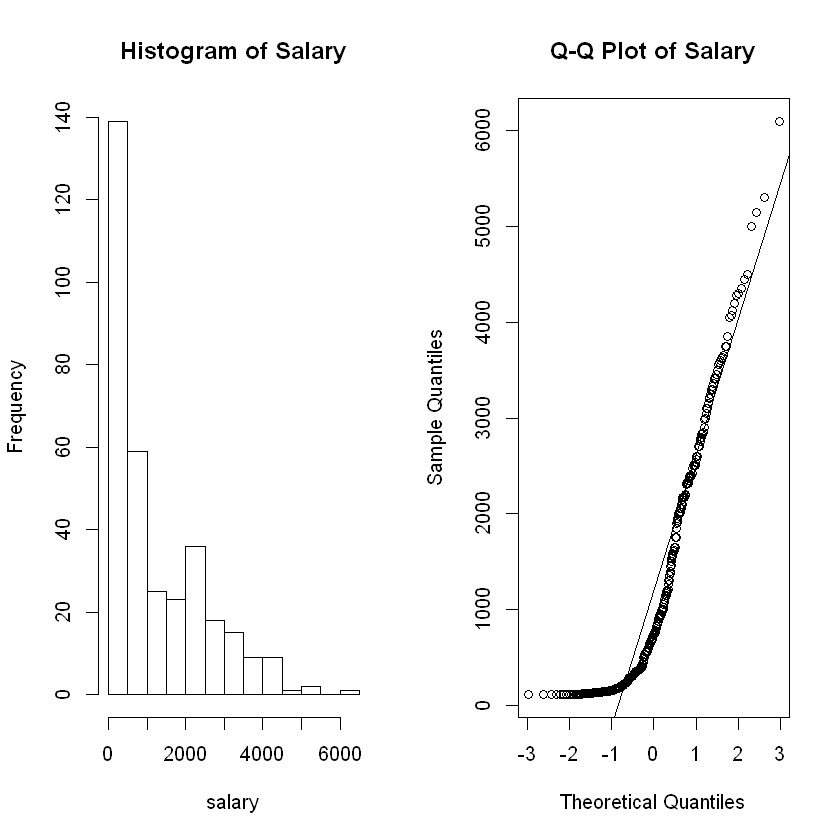

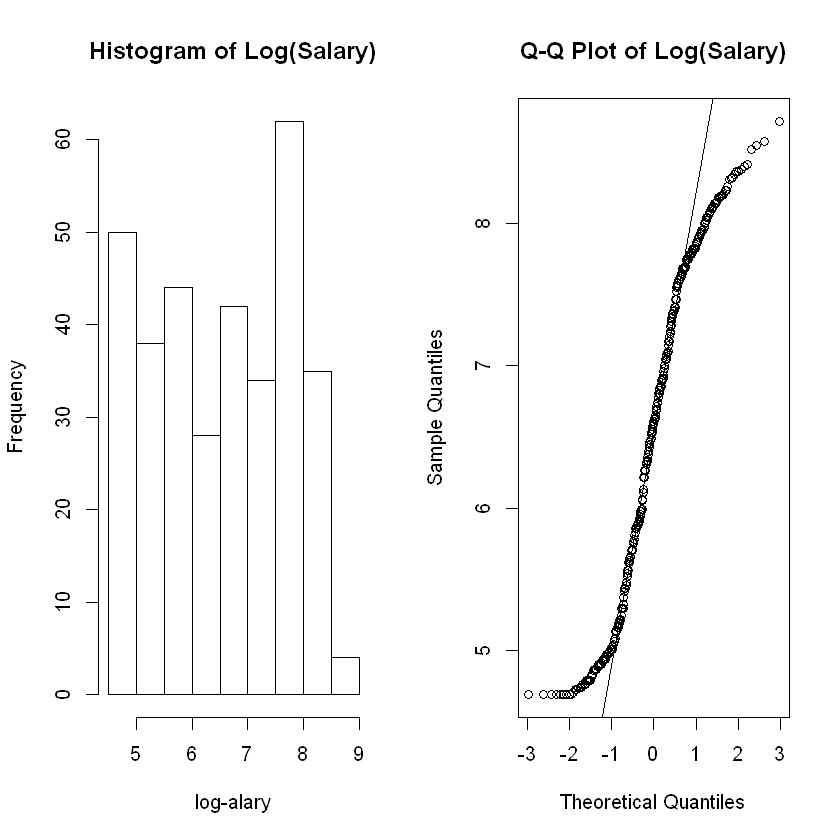

In [11]:
# Histogram & Q-Q plots for Salary

layout(matrix(c(1,2),1,2))
hist(baseball$salary, xlab="salary", main="Histogram of Salary")
qqnorm(baseball$salary, main="Q-Q Plot of Salary")
qqline(baseball$salary)

# Histogram & Q-Q plots for Log Salary
hist(baseball$logsalary, xlab="log-alary", main="Histogram of Log(Salary)")

qqnorm(baseball$logsalary, main="Q-Q Plot of Log(Salary)")
qqline(baseball$logsalary)

#### 3.2 Models and Model Diagnostics

##### 3.2.1 Model fitting

Model 1 or fit.1
We fitted the first model, fit.1, using six predictors/variables; hits, RBI, walks, strike.outs, errors, and free.agency.elig. We found the coefficients of the predictors as output in the cell below. The multiple R-squared and adjusted R-squared for this model are 0.6527 and 0.6464 respectively. The multiple R-squared indicates that the model accounts for 65.27 % of the variance in the log of salary. The residual standard error (0.6996) can be thought of as the average error in predicting logsalary from the six variables using this model. It appears that two (walks and errors) of the six predictors are not significant i.e. have coefficients which may not be significantly different from zero.

Model 2 or fit.2
We also fitted a second model, fit.2, using eight predictors/variables; hits, RBI, walks, strike.outs, errors, and free.agency.elig, free.agent.91 and arb.elig, We found the coefficients of the predictors as output in the cell below. The multiple R-squared and adjusted R-squared for this model are 0.7975 and 0.7925 respectively – both higher than those of model 1. The multiple R-squared indicates that the model accounts for 79.75 % of the variance in the log of salary. The residual standard error (0.5359) can be thought of as the average error in predicting logsalary from the six variables using this model. It appears that only one (errors) of the eight predictors is not significant i.e. have coefficients which may not be significantly different from zero.

In [12]:
# Model 1/fit.1 => model with 6 predictors (hits, RBI, walks, strike.outs, errors, free.agency.elig.)

fit.1 <- lm(logsalary ~ hits + RBI + walks + strike.outs + errors + free.agency.elig, data=baseball)
# GET THE TABLE OF PARAMETER ESTIMATES
summary(fit.1)

# Model 2/fit.2 => model with 8 predictors (hits, RBI, walks, strike.outs, errors, free.agency.elig, free.agent.91, arb.elig)

fit.2 <- lm(logsalary ~ hits + RBI + walks + strike.outs + errors + free.agency.elig + free.agent.91 + arb.elig, 
            data=baseball)
# GET THE TABLE OF PARAMETER ESTIMATES
summary(fit.2)


Call:
lm(formula = logsalary ~ hits + RBI + walks + strike.outs + errors + 
    free.agency.elig, data = baseball)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.70583 -0.50656 -0.02607  0.53078  2.07558 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.108553   0.086369  59.148  < 2e-16 ***
hits              0.007911   0.001563   5.061 6.95e-07 ***
RBI               0.012624   0.002896   4.359 1.75e-05 ***
walks             0.003142   0.002484   1.265 0.206773    
strike.outs      -0.006407   0.001782  -3.595 0.000374 ***
errors           -0.001604   0.007292  -0.220 0.825977    
free.agency.elig  1.008197   0.084335  11.955  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6996 on 330 degrees of freedom
Multiple R-squared:  0.6527,	Adjusted R-squared:  0.6464 
F-statistic: 103.4 on 6 and 330 DF,  p-value: < 2.2e-16



Call:
lm(formula = logsalary ~ hits + RBI + walks + strike.outs + errors + 
    free.agency.elig + free.agent.91 + arb.elig, data = baseball)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43061 -0.29106 -0.03605  0.32692  1.50084 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.945703   0.067270  73.521  < 2e-16 ***
hits              0.004749   0.001215   3.908 0.000113 ***
RBI               0.010536   0.002223   4.740 3.19e-06 ***
walks             0.003423   0.001911   1.791 0.074247 .  
strike.outs      -0.004311   0.001374  -3.138 0.001856 ** 
errors           -0.007602   0.005679  -1.339 0.181646    
free.agency.elig  1.606375   0.081298  19.759  < 2e-16 ***
free.agent.91    -0.270868   0.104750  -2.586 0.010145 *  
arb.elig          1.315687   0.086930  15.135  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5359 on 328 degrees of freedom
Multiple R-squared:  0

In [13]:
# Coefficients of predictors and intercept of models

"Coefficients of predictors and intercept of model 1:"
fit.1$coefficients

"Coefficients of predictors and intercept of model 2:"
fit.2$coefficients

[1] "Coefficients of predictors and intercept of model 1:"

(Intercept)             hits              RBI            walks 
     5.108552582      0.007911001      0.012624268      0.003142004 
     strike.outs           errors free.agency.elig 
    -0.006407025     -0.001604417      1.008196757

[1] "Coefficients of predictors and intercept of model 2:"

(Intercept)             hits              RBI            walks 
     4.945702678      0.004748716      0.010535963      0.003422647 
     strike.outs           errors free.agency.elig    free.agent.91 
    -0.004310968     -0.007602098      1.606375182     -0.270867943 
        arb.elig 
     1.315686584

##### 3.2.2 Model Assumptions

Moving forward, we checked on the linear regression model assumptions. The assumptions are that the conditional mean response is a LINEAR function of the predictor variables; the residual errors are INDEPENDENT random variables; the residual errors are conditionally NORMAL random variables, given the predictor variable values; and the residual errors have EQUAL variance. Much of our assumption checking involve looking at plots of the residuals (which are the observed error values) and running hypothesis tests about them.

#### Multicollinearity

To check multicollinearity between the predictors or our models, we calculated the condition numbers and the variance inflation factors, VIFs. The condition number is done by first obtaining the eigenvalues of XTX (where X here is the model matrix without the first column for the bias/intercept). The condition number, k measures the relative magnitude of the largest eigenvalue to the smallest. Condition numbers are useful in ascertaining collinearity. Values over 15 indicate a collinearity concern, and values over 30 indicate a major concern. We seem to have a major concern with our models because our condition numbers without the intercept are 196 and 415.6 for the two models respectively are way above 30. 

If the jth predictor has a large variance, the variance in the jth model coefficient will be large. Also, high R-squared of j will cause the variance in the jth model coefficient will be large. The 1/(1 – R-squared of j) are called the variance inflation factors (VIFs). VIFs more than 5 or 10 or its square root VIFs exceeding 2 indicate presence of multicollinearity, thus contributing to poor reliability in the estimated model coefficients (the regression coefficients could be way off). The standard errors for the coefficients can be high. 

It turns out that two of the predictors (hits and RBI) with square root of VIFs above 2 are and are highly correlated with one or more of the other variables as shown by the correlation matrix. The correlation matrices using a threshold of ± 0.4 revealed that there exists a high correlation between many of the variables. Hence, the assumption that there should not be multicollinearity among the predictors is not satisfied for both models.

In [14]:
# COMPUTE CONDITION NUMBER WITHOUT INTERCEPT
# Model 1
cn.1 <- lm(logsalary ~ hits + RBI + walks + strike.outs + errors + free.agency.elig -1, data=baseball, x=TRUE)
"Condition number for model 1:"
kappa(cn.1$x)

# Model 2
cn.2 <- lm(logsalary ~ hits + RBI + walks + strike.outs + errors + free.agency.elig + free.agent.91 + arb.elig -1, 
           data=baseball, x=TRUE)
"Condition number for model 2:"
kappa(cn.2$x)

[1] "Condition number for model 1:"

[1] 196.0145

[1] "Condition number for model 2:"

[1] 415.5786

In [15]:
# Variance Inflation Factors, VIFs 

"VIFs and square root VIFs of model 1:"
vif(fit.1)
sqrt(vif(fit.1))

"VIFs and square root VIFs of model 2:"
vif(fit.2)
sqrt(vif(fit.2))

[1] "VIFs and square root VIFs of model 1:"

hits              RBI            walks      strike.outs 
        4.518039         5.031255         2.613848         2.495438 
          errors free.agency.elig 
        1.282377         1.172971

hits              RBI            walks      strike.outs 
        2.125568         2.243046         1.616740         1.579696 
          errors free.agency.elig 
        1.132421         1.083038

[1] "VIFs and square root VIFs of model 2:"

hits              RBI            walks      strike.outs 
        4.652468         5.050359         2.637470         2.527120 
          errors free.agency.elig    free.agent.91         arb.elig 
        1.325905         1.857650         1.317624         1.380452

hits              RBI            walks      strike.outs 
        2.156958         2.247300         1.624029         1.589692 
          errors free.agency.elig    free.agent.91         arb.elig 
        1.151480         1.362956         1.147878         1.174926

In [16]:
# Verifying multicollinearity from correlation matrix

"Correlation matrix of model 1 predictors"
fit.1.predictors <- subset(baseball, select=c(hits, RBI, walks, strike.outs, errors, free.agency.elig))
cor(fit.1.predictors)

"Correlation matrix of model 2 predictors"
fit.2.predictors <- subset(baseball, select=c(hits, RBI, walks, strike.outs, errors, free.agency.elig, free.agent.91, 
                                              arb.elig))
cor(fit.2.predictors)

[1] "Correlation matrix of model 1 predictors"

,hits,RBI,walks,strike.outs,errors,free.agency.elig
hits,1.0000000,0.8516157,0.7230097,0.6462582,0.41589377,0.29266338
RBI,0.8516157,1.0000000,0.7270564,0.7454505,0.29305472,0.30797366
walks,0.7230097,0.7270564,1.0000000,0.6663276,0.24300841,0.35139245
strike.outs,0.6462582,0.7454505,0.6663276,1.0000000,0.30158792,0.22515543
errors,0.4158938,0.2930547,0.2430084,0.3015879,1.00000000,-0.01575829
free.agency.elig,0.2926634,0.3079737,0.3513924,0.2251554,-0.01575829,1.00000000


[1] "Correlation matrix of model 2 predictors"

,hits,RBI,walks,strike.outs,errors,free.agency.elig,free.agent.91,arb.elig
hits,1.00000000,0.85161568,0.72300970,0.646258214,0.41589377,0.29266338,0.035171284,0.18820927
RBI,0.85161568,1.00000000,0.72705641,0.745450537,0.29305472,0.30797366,0.024258822,0.12654902
walks,0.72300970,0.72705641,1.00000000,0.666327573,0.24300841,0.35139245,0.016567960,0.03148368
strike.outs,0.64625821,0.74545054,0.66632757,1.000000000,0.30158792,0.22515543,-0.009760519,0.03920710
errors,0.41589377,0.29305472,0.24300841,0.301587921,1.00000000,-0.01575829,0.078222219,0.21201364
free.agency.elig,0.29266338,0.30797366,0.35139245,0.225155429,-0.01575829,1.00000000,0.445266264,-0.39717016
free.agent.91,0.03517128,0.02425882,0.01656796,-0.009760519,0.07822222,0.44526626,1.000000000,-0.17684647
arb.elig,0.18820927,0.12654902,0.03148368,0.039207098,0.21201364,-0.39717016,-0.176846471,1.00000000


#### Homoscedasticity

We computed Score Test for Non-Constant Error Variance using the ncvTest() function with null hypothesis of constant error variance. We also plotted residuals versus fitted values, and the spread-level plot using the spreadLevelPlot() function. The large p-values (0.45834 and 0.58693 both larger than 0.05), output of the plot of residuals versus fits with the centering of values around zero and no-pattern output, and the spread-level plot with the points forming a random almost horizontal line of best fit all justified constant error variance or homoscedasticity i.e. the models’ random variables have the same finite variance. The suggested power transformations are 1.7256 and 0.818. That of model 1 is well above 1 while that of model 2 is approximately 1 indicating no transformation needed. The homoscedasticity assumption is satisfied for both models.

In [17]:
# Non-constant Error Variance test

# A LARGE P-VALUE (> 0.05) JUSTIFIES EQUAL VARIANCE
"Score Test For Non-Constant Error Variance - model 1:"
ncvTest(fit.1) 

"Score Test For Non-Constant Error Variance - model 2:"
ncvTest(fit.2)

[1] "Score Test For Non-Constant Error Variance - model 1:"

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.5499524, Df = 1, p = 0.45834

[1] "Score Test For Non-Constant Error Variance - model 2:"

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2951675, Df = 1, p = 0.58693

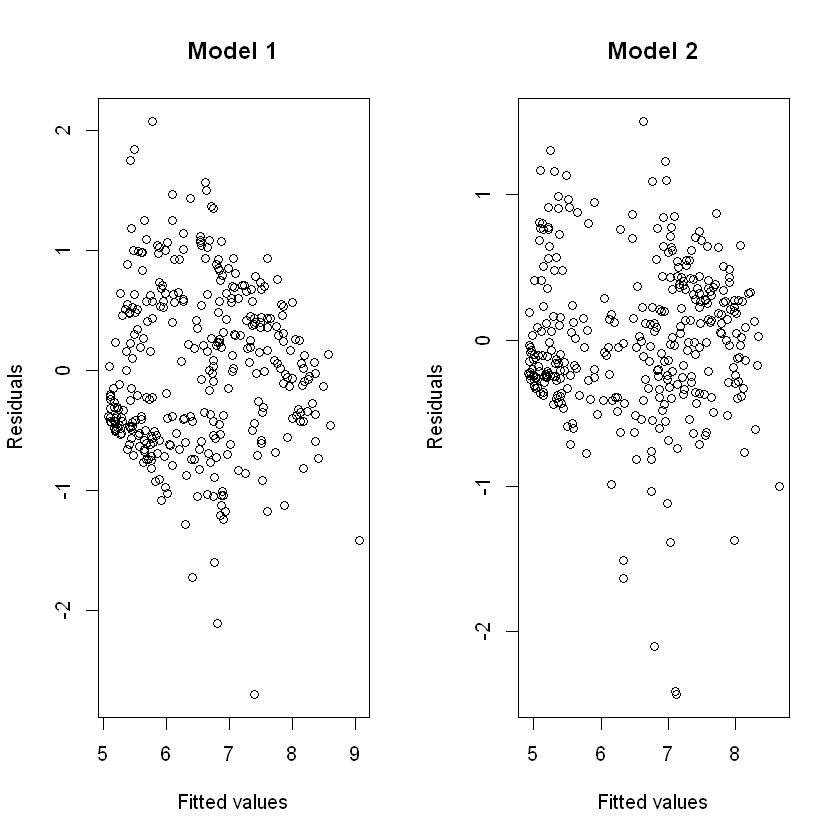

In [18]:
# Residuals versus fits plot

layout(matrix(c(1,2),1,2))
plot(fit.1$residuals ~ fit.1$fitted.values, ylab="Residuals", xlab="Fitted values", 
     main="Model 1")

plot(fit.2$residuals ~ fit.2$fitted.values, ylab="Residuals", xlab="Fitted values", 
     main="Model 2")


Suggested power transformation:  1.725638 


Suggested power transformation:  0.8183417 

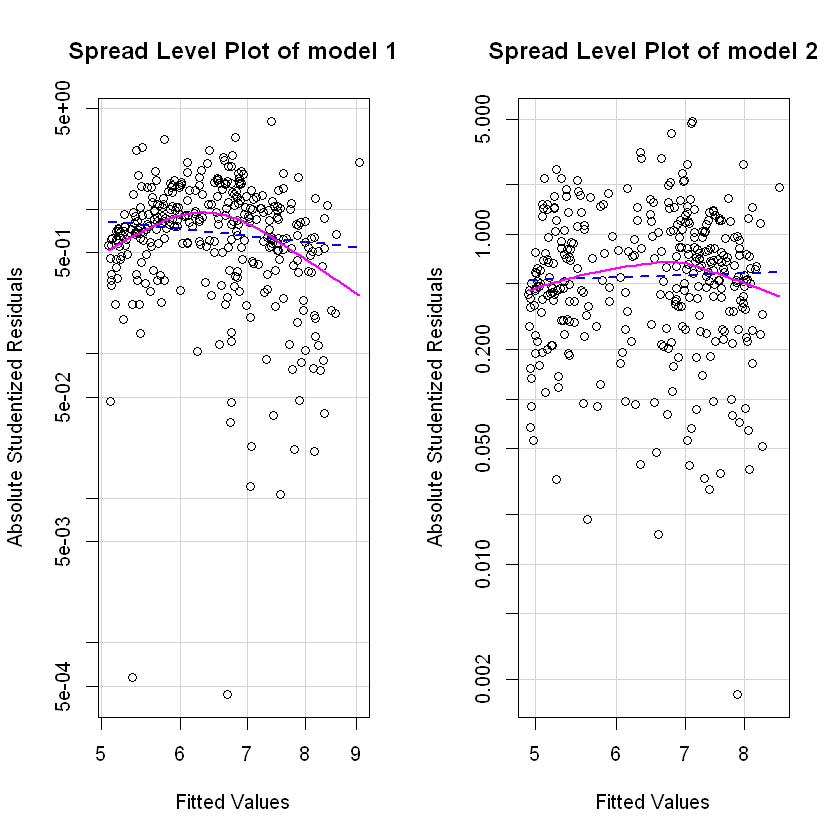

In [19]:
# Plot Absolute Jackknife Residuals vs. Fitted values 
# Power Box-Cox Transformation on the response Y is suggested 

layout(matrix(c(1,2),1,2))
spreadLevelPlot(fit.1, main="Spread Level Plot of model 1")

spreadLevelPlot(fit.2, main="Spread Level Plot of model 2")

#### Independence of errors or autocorrelation

Durbin-Watson-Test and the autocorrelation function, ACF plots of residuals showed that there is autocorrelation. The Durbin-Watson-Test with p-values of 0 far less than 0.05 and ACF plot having many lines crossing the threshold are sufficient evidence that model 1 does not satisfy the independence of errors or autocorrelation assumption. 

For model 2, there may be or not autocorrelation because our p-value is close to 0.05 and the ACF plot does not have many lines crossing the threshold.  We conclude this assumption check that the errors are not independent and there is autocorrelation in model 1 but are independent and no autocorrelation in model 2.

In [20]:
# Durbin Watson Test for Autocorrelated Errors
# LARGE P-VALUE (> 0.05) JUSTIFIES INDEPENDENCE

durbinWatsonTest(fit.1) 
durbinWatsonTest(fit.2)

 lag Autocorrelation D-W Statistic p-value
   1       0.2862263      1.425901       0
 Alternative hypothesis: rho != 0

 lag Autocorrelation D-W Statistic p-value
   1       0.1026467      1.793532   0.056
 Alternative hypothesis: rho != 0

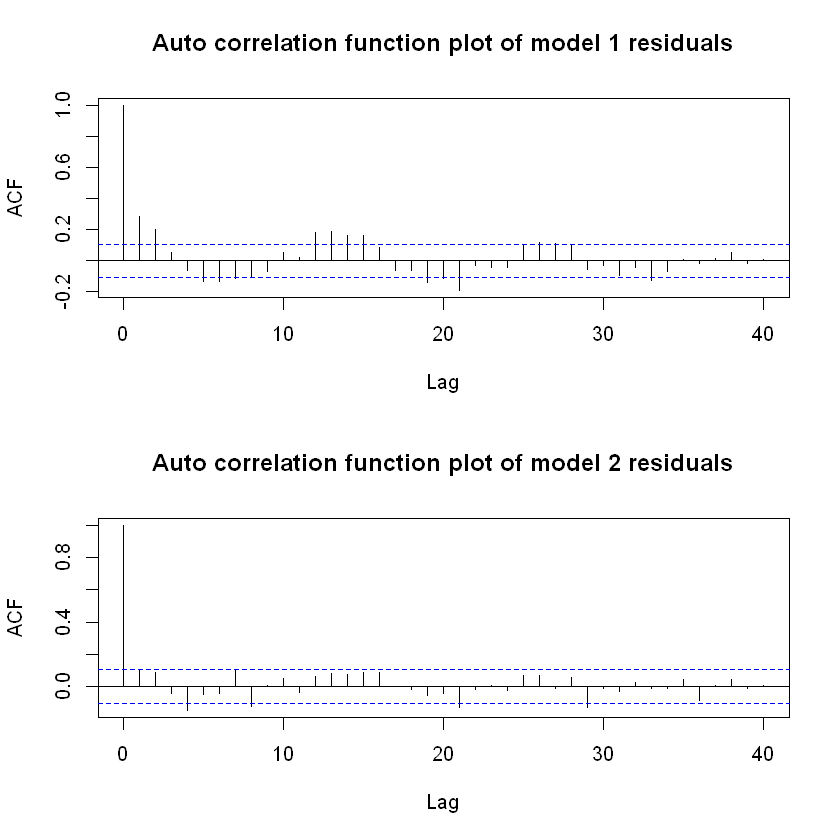

In [21]:
# Autocorrelation function plot of residuals

layout(matrix(c(1,2),2,1))
acf(fit.1$residuals, lag.max=40, main="Auto correlation function plot of model 1 residuals")
acf(fit.2$residuals, lag.max=40, main="Auto correlation function plot of model 2 residuals")

#### Linearity

We checked the linearity assumption using scatterplot and the component plus residual plots or partial residual plots with the help of the crPlots() function. The scatterplot did not show any linear trend between the dependent variable and each of the predictors. Nonlinearity in any of the component plus residual plots or partial residual plots suggests that we may not have adequately modeled the functional form of that predictor. This assumption is not totally satisfied by both models.

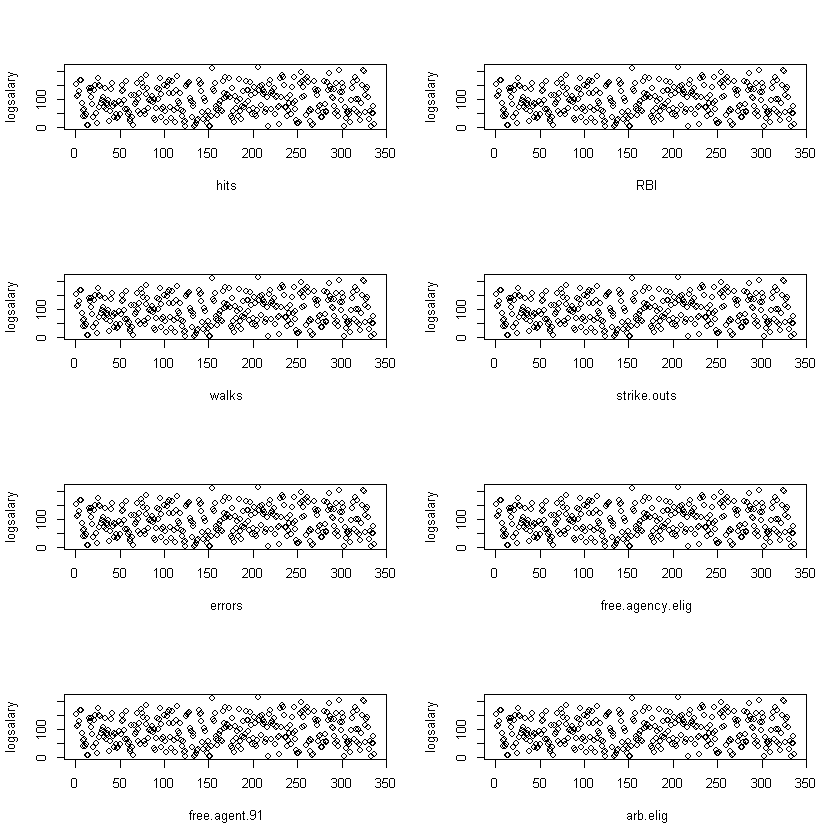

In [22]:
# Scatter plot of response versus other variables 

models.variables <- subset(baseball, select=c(hits, RBI, walks, strike.outs, errors, free.agency.elig, free.agent.91, 
                                              arb.elig))
par(mfrow=c(4, 2))
for(i in 1:8){
    plot(models.variables[,1], fit.2$logsalary, xlab=paste("", names(models.variables)[i]), ylab="logsalary")
}

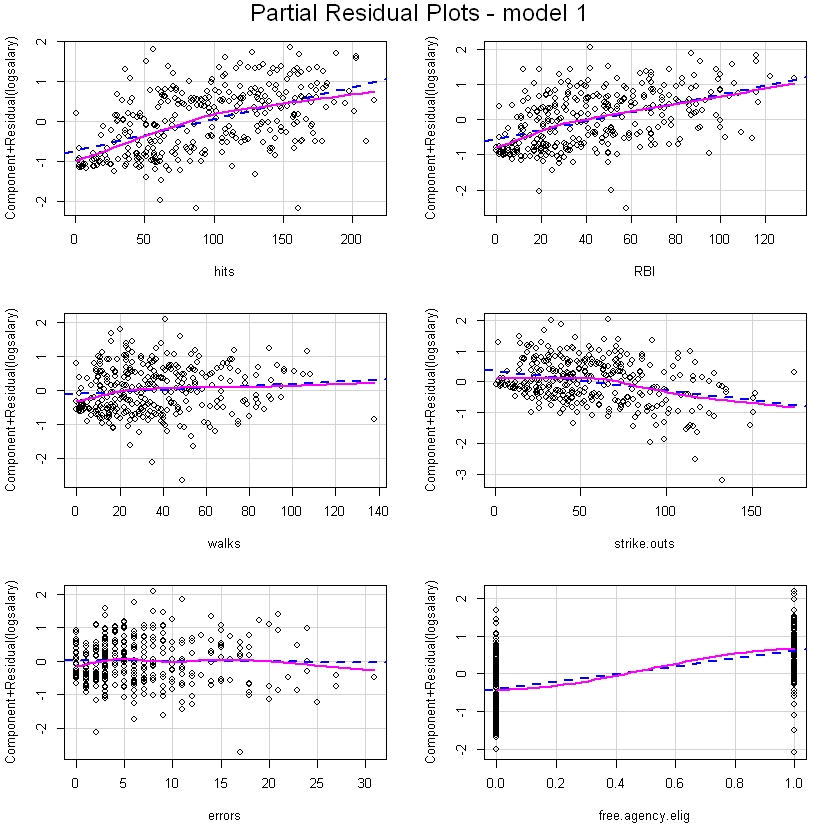

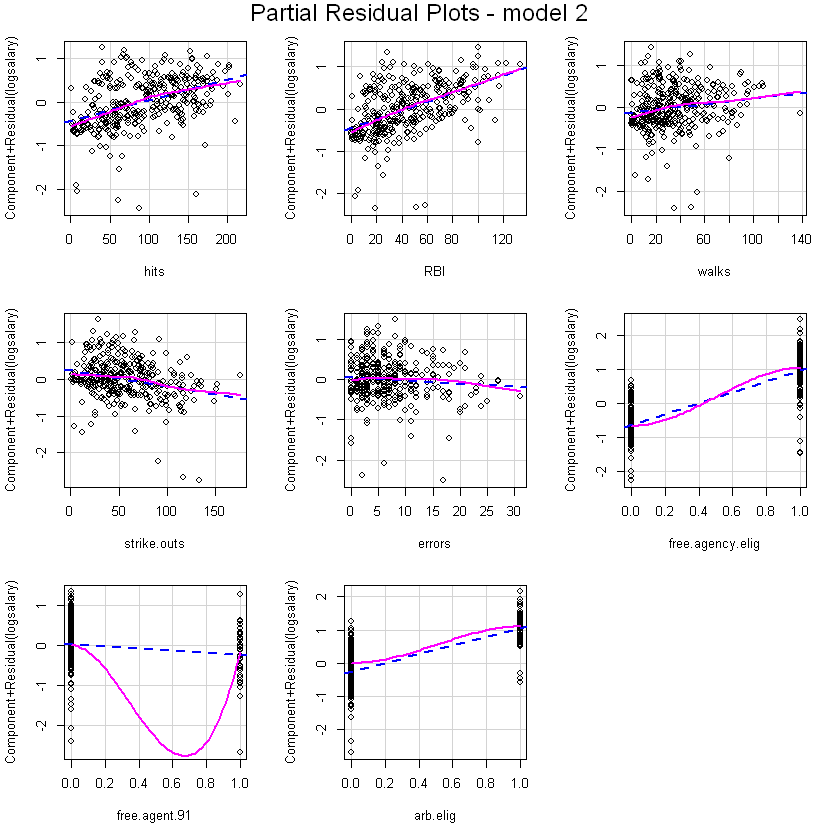

In [23]:
# Evaluate Nonlinearity VIA THE component + residual plot (partial residual)

crPlots(fit.1, main="Partial Residual Plots - model 1")

crPlots(fit.2, main="Partial Residual Plots - model 2")

#### Normality of residuals

We made histogram plot of residuals and probability plots of residuals to softly check for Normality. We also run Shapiro-Wilks tests and Anderson-Darling tests to check for Normality.
Model 2 plots appear to conform more to a normal distribution than plots for model 1. The plots are both near normal and not to perfectly normal distribution plots. This was validated by Shapiro-Wilk's and Anderson Darling tests showed (with p-values < 0.05) that there is enough evidence that the residuals distributions are significantly not from a normal distribution. The normality of errors assumption is not satisfied by both models.

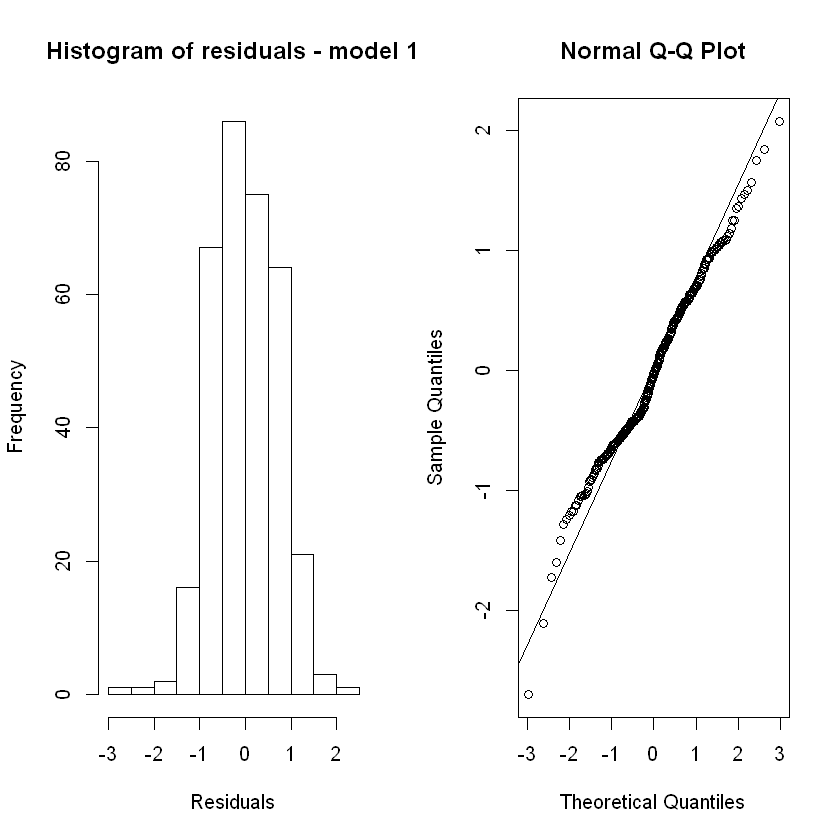

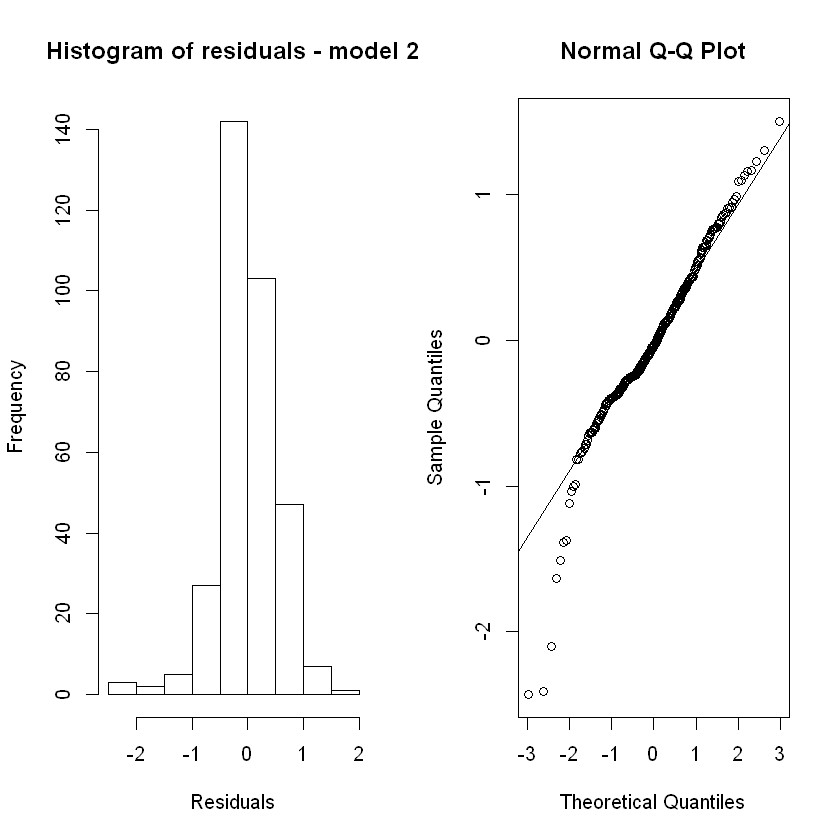

In [24]:
# Histogram and Q-Q norm plot - model 1

layout(matrix(c(1,2),1,2))
hist(fit.1$residuals, xlab="Residuals", main="Histogram of residuals - model 1")

qqnorm(fit.1$residuals)
qqline(fit.1$residuals)

# Histogram and Q-Q norm plot - model 2
hist(fit.2$residuals, xlab="Residuals", main="Histogram of residuals - model 2")

qqnorm(fit.2$residuals)
qqline(fit.2$residuals)

In [25]:
shapiro.test(fit.1$residuals)
ad.test(fit.1$residuals)


	Shapiro-Wilk normality test

data:  fit.1$residuals
W = 0.98669, p-value = 0.003424



	Anderson-Darling normality test

data:  fit.1$residuals
A = 1.7, p-value = 0.0002296


In [26]:
shapiro.test(fit.2$residuals)
ad.test(fit.2$residuals)


	Shapiro-Wilk normality test

data:  fit.2$residuals
W = 0.95582, p-value = 1.547e-08



	Anderson-Darling normality test

data:  fit.2$residuals
A = 2.3422, p-value = 6.112e-06


#### Global Validation of Linear Model Assumptions

We performed using the gvlma() function a single global test to assess the linear model assumptions, as well as perform specific directional tests designed to detect skewness, kurtosis, a nonlinear link function, and heteroscedasticity. Model 1 satisfies three of the assumptions while model 2 satisfies only two at 5 % significant level.

In [27]:
# GLOBAL TEST OF MODEL ASSUMPTIONS 

gvmodel.1 <- gvlma(fit.1, alphalevel=0.05) 
summary(gvmodel.1)


Call:
lm(formula = logsalary ~ hits + RBI + walks + strike.outs + errors + 
    free.agency.elig, data = baseball)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.70583 -0.50656 -0.02607  0.53078  2.07558 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.108553   0.086369  59.148  < 2e-16 ***
hits              0.007911   0.001563   5.061 6.95e-07 ***
RBI               0.012624   0.002896   4.359 1.75e-05 ***
walks             0.003142   0.002484   1.265 0.206773    
strike.outs      -0.006407   0.001782  -3.595 0.000374 ***
errors           -0.001604   0.007292  -0.220 0.825977    
free.agency.elig  1.008197   0.084335  11.955  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6996 on 330 degrees of freedom
Multiple R-squared:  0.6527,	Adjusted R-squared:  0.6464 
F-statistic: 103.4 on 6 and 330 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING TH

In [28]:
gvmodel.2 <- gvlma(fit.2, alphalevel=0.05) 
summary(gvmodel.2)


Call:
lm(formula = logsalary ~ hits + RBI + walks + strike.outs + errors + 
    free.agency.elig + free.agent.91 + arb.elig, data = baseball)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43061 -0.29106 -0.03605  0.32692  1.50084 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.945703   0.067270  73.521  < 2e-16 ***
hits              0.004749   0.001215   3.908 0.000113 ***
RBI               0.010536   0.002223   4.740 3.19e-06 ***
walks             0.003423   0.001911   1.791 0.074247 .  
strike.outs      -0.004311   0.001374  -3.138 0.001856 ** 
errors           -0.007602   0.005679  -1.339 0.181646    
free.agency.elig  1.606375   0.081298  19.759  < 2e-16 ***
free.agent.91    -0.270868   0.104750  -2.586 0.010145 *  
arb.elig          1.315687   0.086930  15.135  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5359 on 328 degrees of freedom
Multiple R-squared:  0

#### Outlier detection

Outliers are observations that are not predicted well by the model. Outliers can bias parameter estimates (e.g., mean), and they also affect sums of squares. Sums of squares are used to estimate the standard error, so if your sums of squares are biased, standard error likely is too. Outliers could lead to biased confidence intervals which is calculated from sums of squares. We need to get rid of outliers. 
The function outlierTest() was deployed to help detect outliers. The function reports the Bonferroni adjusted p-value for the largest absolute studentized residual. Player 284 in model 1 and players 284, 322 and 205 are such that their dependent variables in the linear model have unusual value based on their independent variables. They are the most extreme observation in our data, and are indeed outliers because the null can be rejected (adjusted/Bonferroni p < 0.05) 

The Studentized residuals versus residuals plot helps us find influential cases, if any are present in the data. Outliers may or may not be influential points. Influential outliers are of the greatest concern. They could alter the results, depending on whether they are included or excluded from the analysis. We could hardly see a dash red curved line (Cook’s distance). With the red Cook’s distance curved line just barely peaking out of the corner of plot but none of data points (261, 284, and 322 in model 1 and 205, 284, and 322) are within it, suggested that these players were not truly influential on our regression models.

Testing for Influential Observations: Cook’s Distance
The Cook’s distance versus observation number plot below is a measure of the influence of each observation on the regression coefficients. The Cook’s distance statistic is a measure, for each observation in turn, of the extent of change in model estimates when that particular observation is omitted. Any observation for which the Cook’s distance is close to 1 or more, or that is substantially larger than other Cook’s distances (highly influential data points), requires investigation.

Players 205, 261, 284, and 322 appear to be the most influential observations in our data, confirming what we saw above in the Studentized residuals versus residuals plot to get a sense of whether any data points are influential. However, it is important to note that the Studentized residuals versus residuals plot suggested that these observations were not truly influential on our regression results.

In [29]:
# Bonferonni p-value for most extreme observations
"Outlier test for Model 1:"
outlierTest(fit.1)

"Outlier test for Model 2:"
outlierTest(fit.2) 

[1] "Outlier test for Model 1:"

     rstudent unadjusted p-value Bonferroni p
284 -4.051429          6.356e-05      0.02142

[1] "Outlier test for Model 2:"

     rstudent unadjusted p-value Bonferroni p
284 -4.844942         1.9591e-06    0.0006602
322 -4.729987         3.3450e-06    0.0011273
205 -4.086768         5.5091e-05    0.0185660

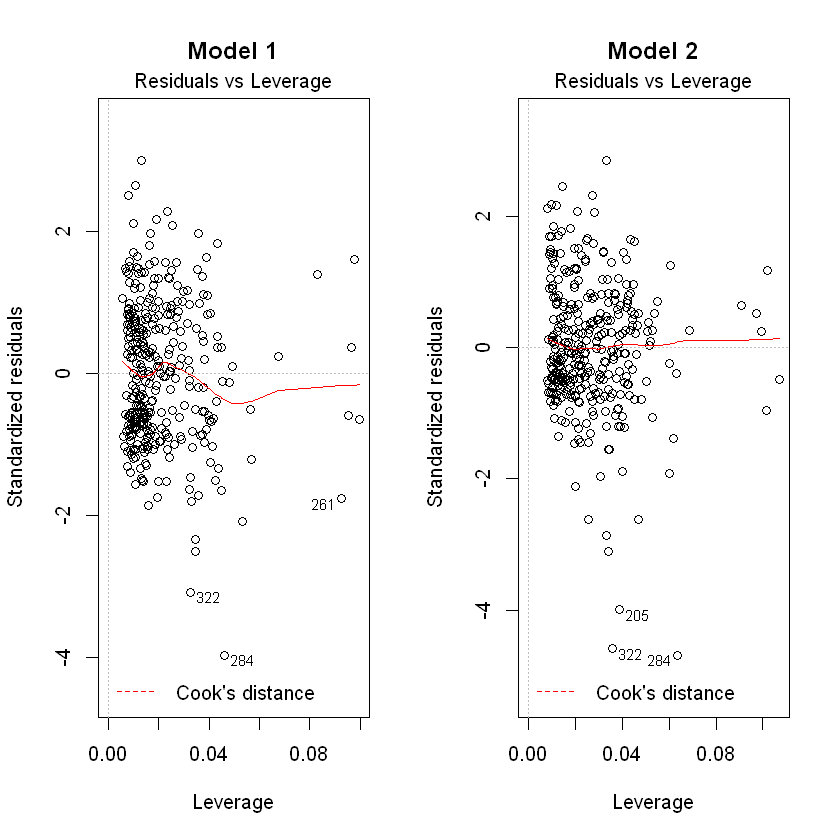

In [30]:
# Studentized residuals versus residuals

layout(matrix(c(1,2),1,2))
plot(fit.1, which=5, main="Model 1")
plot(fit.2, which=5, main="Model 2")

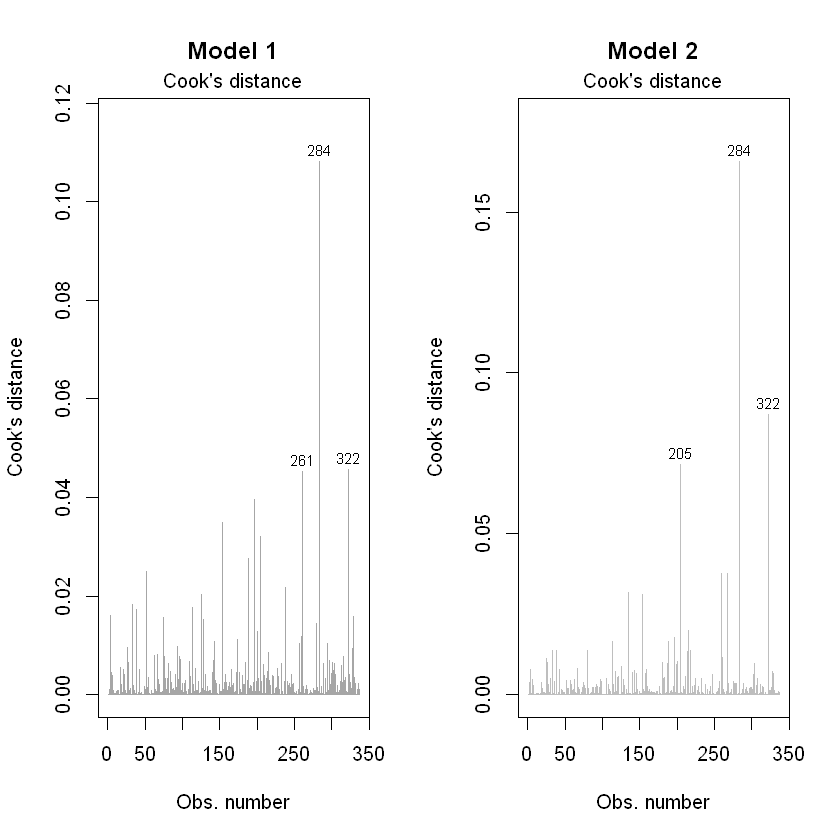

In [31]:
# Plot of Cook's Distance

layout(matrix(c(1,2),1,2))
p <- length(fit.1$coefficients)
n <- nrow(baseball)
cutoff <- 4/(n-p-2)
plot(fit.1, which=4, cook.levels=cutoff, col="gray65", lwd=1.5, main="Model 1")
plot(fit.2, which=4, cook.levels=cutoff, col="gray", lwd=1.5, main="Model 2")

#### 3.3 Model Comparison

From the p-value (3.9 e-39 << 0.05) of the ANOVA table, we conclude that adding two more variables to our model for prediction added to the linear prediction and we are justified by adding them in our model. Also, the model with the lower Akaike Information Criterion, AIC score is preferred. The AIC score suggest that model 2 is the better model.

In [32]:
# Comparing models using the anova() function

anova(fit.2, fit.1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
328,94.19849,NA,NA,NA,NA
330,161.51498,-2,-67.31649,117.1983,3.947339e-39


In [33]:
# Comparing models using the Akaike information criterion, AIC

AIC(fit.1, fit.2)

,df,AIC
fit.1,8,724.5061
fit.2,10,546.7978


#### REFERENCES

Many parts of codes and notes from Dr. Masum Bhuiyan’s Predictive Analytics STAT 5290 class (Spring 2021)

Parts of notes from Dr. Matthew Jones’ Regression Analysis STAT 5120 class (Spring 2020)

Christensen, R. (1996),_Analysis of Variance, Design and Regression: Applied Statistical Methods_,  New York: Chapman and Hall.

Neter, J., Kutner, M. H., Nachtsheim, C. J., and Wasserman, W. (1996), _Applied Linear Statistical Models_ (4th ed.), Chicago: Irwin.

Hair, J. F., Hult, G. T. M., Ringle, C. M., and Sarstedt, M. 2017. A Primer on Partial Least Squares Structural Equation Modeling (PLS-SEM). 2nd Ed. Thousand Oaks, CA: Sage

https://github.com/shivangi2012/Multiple-Linear-Regression-Analysis/blob/master/R%20notebook%20report.pdf

https://joshualoong.com/2019/09/20/Appreciating-R-The-Ease-of-Testing-Linear-Model-Assumptions/

https://www.rdocumentation.org

https://ademos.people.uic.edu/Chapter12.html

https://www.r-project.org/